## Capturing uncertainity in neural nets :

#### $ aleotoric(data$ $ uncertainity )$
    

In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import jax.tree_util as jtu


### Model capturing aleotoric uncertainty
#### dataset containing homoskedastic noise

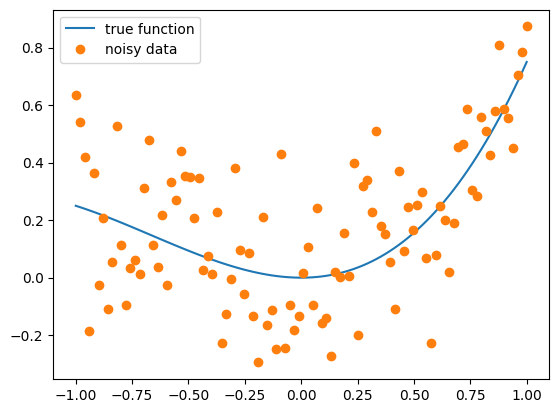

In [2]:
torch.manual_seed(42)
N = 100
x_lin= torch.linspace(-1,1,N)
fun = lambda x: 0.5 * x**2 + 0.25 * x**3
plt.plot(x_lin,fun(x_lin),label='true function');
eps = torch.randn(N) * 0.2
y = fun(x_lin) + eps
plt.plot(x_lin,y,'o',label='noisy data')
plt.legend();



In [3]:
class MeanEstimateNN(torch.nn.Module):
    def __int__(self,n_hidden=4):
        self.fc1 = torch.nn.Linear(1,n_hidden)
        self.fc2 = torch.nn.Linear(n_hidden,n_hidden)
        self.fc3 = torch.nn.Linear(n_hidden,1)

    def forward(self,x):
        x = self.fc1(x)
        x = torch.relu(x)
        x = self.fc2(x)
        x = torch.relu(x)
        mu_hat = self.fc3(x)
        return mu_hat        

In [4]:
def loss_homoskedastic_noice(model,x,y,params):
    log_noise_std = params['log_noise_std']
    mu_hat = model(x).squeeze()
    assert mu_hat.shape == y.shape
    noise_std=torch.exp(log_noise_std).expand_as(mu_hat)
    dist=torch.distributions.Normal(mu_hat,noise_std)
    return -dist.log_prob(y).mean()

In [5]:
homoskedastic_model_fixed_noise = MeanEstimateNN()
homoskedastic_model_fixed_noise

MeanEstimateNN()

In [6]:
fixed_log_noise_std = torch.log(torch.tensor(0.5))
params = {'nn_params':homoskedastic_model_fixed_noise.state_dict(),
          'log_noise_std':fixed_log_noise_std,}

loss_homoskedastic_noice(homoskedastic_model_fixed_noise,x_lin[:, None],y,params)

AttributeError: 'MeanEstimateNN' object has no attribute 'fc1'